<a href="https://colab.research.google.com/github/dmbk/Anomaly-Detection-System/blob/master/OUTPUT_SAVE_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imageio
!pip install qpsolvers
!pip install shapely 
#!pip install tensorflow_datasets
!pip install keras-layer-normalization
from google.colab import drive
#!pip install alive-progress
drive.mount('/content/drive', force_remount=True)


  Created wheel for qpsolvers: filename=qpsolvers-1.3-cp36-none-any.whl size=17440 sha256=37bacad72626effa25c6b5f39ec7a8546adab32fe33135f5f07b240f72fa7270
  Stored in directory: /root/.cache/pip/wheels/a3/00/88/2755bd079a831e8d1b38a3e0038cc9d41d0dc907dc97268ff4
  Created wheel for quadprog: filename=quadprog-0.1.7-cp36-cp36m-linux_x86_64.whl size=307614 sha256=2a88bf195dc6a3c4e634d44ede7386da844136653024caf39365ae3a7ab06934
  Stored in directory: /root/.cache/pip/wheels/36/dd/b1/849989444c0a5930927b260663019b7da6cff864fc224c2747
Successfully built qpsolvers quadprog
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.14.0-cp36-none-any.whl size=5268 sha256=dcba74b6ff1c3910c56a587054df623cb2a01eddd1610a5550046a3d3cf06bf9
  Stored in directory: /root/.cache/pip/wheels/54/80/22/a638a7d406fd155e507aa33d703e3fa2612b9eb7bb4f4fe667
Successfully built keras-layer-normalization
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=94731

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from shapely.geometry import LineString

def getEER_Thresh(x, f, g):

    plt.plot(x, f, "o")
    plt.plot(x, f, color="blue")
    plt.plot(x, g, "r--", color="gray")

    first_line = LineString(np.column_stack((x, f)))
    second_line = LineString(np.column_stack((x, g)))
    intersection = first_line.intersection(second_line)
    print("Intersection")
    #print(intersection)
    x_list = []
    if intersection.geom_type == 'MultiPoint':
        plt.plot(*LineString(intersection).xy, "o")
        plt.plot([0, 0.1, 0.2, 0.3, 1], [0, 0.1, 0.2, 0.3, 1], "r--")
        print("Multipoint")
        print(*LineString(intersection).xy[0])
        for x_point in LineString(intersection).xy[0]:
            x_list.append(x_point)
    elif intersection.geom_type == 'Point':
        plt.plot(*intersection.xy, "o")
        plt.plot([0, 0.1, 0.2, 0.3, 1], [0, 0.1, 0.2, 0.3, 1], "r--")
        print("Point")
        print(*intersection.xy[0])
        x_list.append(*intersection.xy[0])

    x_arr = np.array(x_list)
    #print("X_LIST")
    #print(x_arr)
    return x_arr

def show_roc(TPR, FPR):
    plt.title('Receiver Operating Characteristic')
    plt.plot(savgol_filter(FPR, 5, 3), savgol_filter(TPR, 5, 3), 'b', label = "FPR vs TPR")
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print("TPR")
    print(TPR)
    print("FPR")
    print(FPR)

    def integrate(x, y):
        area = np.trapz(y=y, x=x, dx=0.05)
        return area
#TPR = np.array(savgol_filter(TPR, 5, 3))
#FPR = np.array(savgol_filter(FPR, 5, 3))
    TPR = np.array(TPR)
    FPR = np.array(FPR)
    eer_arr = getEER_Thresh(FPR, TPR, 1-FPR)
    print(eer_arr.size)
    eer_threshold = 1 -eer_arr[0]
    print("EER = "+str(eer_arr[0]))
    print("EER Threshold =  "+str(eer_threshold))
    print("AUC = "+str(integrate(FPR, TPR)))


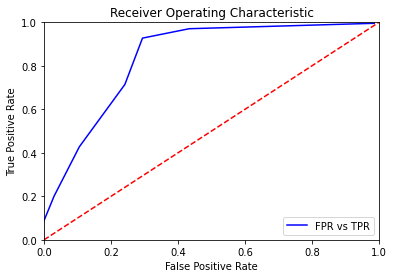

TPR
[0, 0, 0, 0, 0.069767441860465, 0.232558139534884, 0.372093023255814, 0.744186046511628, 0.953488372093023, 0.953488372093023, 1]
FPR
[0, 0, 0, 0, 0, 0.022222222222222, 0.111111111111111, 0.222222222222222, 0.377777777777778, 0.377777777777778, 1]
Intersection
Point
0.23654390934844177
1
EER = 0.23654390934844177
EER Threshold =  0.7634560906515582
AUC = 0.8320413436692506


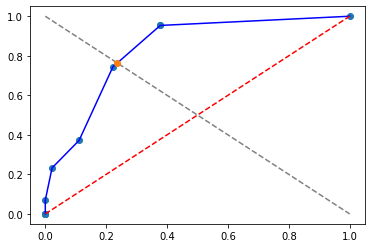

In [16]:

#ped1 edge gt corrected
plt.title('Receiver Operating Characteristic')
TPR = [0,	0,	0,	0,	0.069767441860465,	0.232558139534884,	0.372093023255814,	0.744186046511628,	0.953488372093023,	0.953488372093023, 1]
FPR = [0,	0,	0,	0,	0,	0.022222222222222,	0.111111111111111,	0.222222222222222,	0.377777777777778,	0.377777777777778, 1]
show_roc(TPR, FPR)

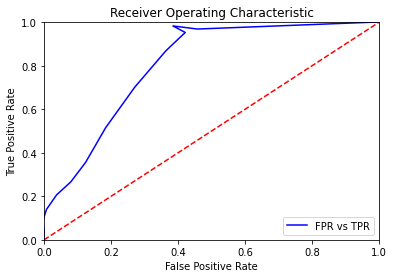

TPR
[0, 0, 0, 0, 0.05, 0.075, 0.15, 0.2, 0.275, 0.35, 0.5, 0.725, 0.85, 0.975, 0.975, 0.975, 1]
FPR
[0, 0, 0, 0, 0, 0, 0, 0.040816326530612, 0.081632653061225, 0.122448979591837, 0.183673469387755, 0.26530612244898, 0.36734693877551, 0.428571428571429, 0.428571428571429, 0.428571428571429, 1]
Intersection
Point
0.2696629213483148
1
EER = 0.2696629213483148
EER Threshold =  0.7303370786516852
AUC = 0.8061224489795917


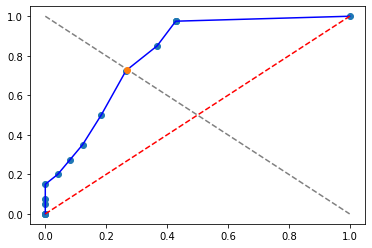

In [17]:
#edge ori ped1
plt.title('Receiver Operating Characteristic')
TPR = [0,	0,	0,	0,	0.05,	0.075,	0.15,	0.2,	0.275,	0.35,	0.5,	0.725,	0.85,	0.975,	0.975,	0.975, 1]
FPR = [0,	0,	0,	0,	0, 0, 0,	0.040816326530612,	0.081632653061225,	0.122448979591837,	0.183673469387755,	0.26530612244898,	0.36734693877551,	0.428571428571429,	0.428571428571429,	0.428571428571429, 1]
show_roc(TPR, FPR)

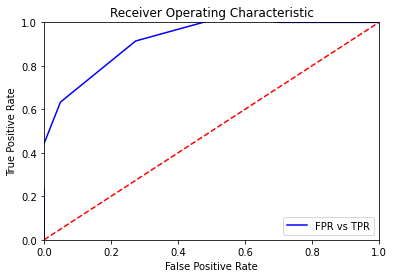

TPR
[0, 0, 0, 0, 0.083333333333333, 0.083333333333333, 0.083333333333333, 0.166666666666667, 0.25, 0.333333333333333, 0.583333333333333, 1, 1, 1, 1, 1, 1]
FPR
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.285714285714286, 0.571428571428571, 0.714285714285714, 0.714285714285714, 0.714285714285714, 1]
Intersection
Point
0.16949152542372894
1
EER = 0.16949152542372894
EER Threshold =  0.8305084745762711
AUC = 0.9404761904761904


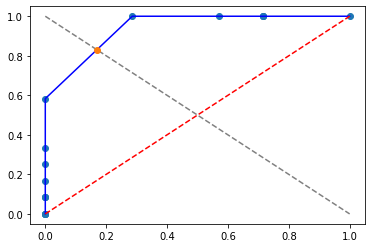

In [18]:


#edge ori ped2
TPR = [0,	0,	0,	0,	0.083333333333333,	0.083333333333333,	0.083333333333333,	0.166666666666667,	0.25,	0.333333333333333,	0.583333333333333,	1,	1,	1,	1,	1, 1]
FPR = [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0.285714285714286,	0.571428571428571,	0.714285714285714,	0.714285714285714,	0.714285714285714, 1]
show_roc(TPR, FPR)

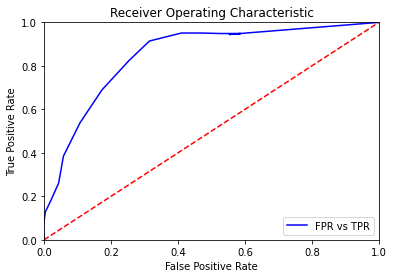

TPR
[0, 0, 0, 0.076923076923077, 0.128205128205128, 0.179487179487179, 0.256410256410256, 0.384615384615385, 0.538461538461538, 0.692307692307692, 0.82051282051282, 0.923076923076923, 0.948717948717949, 0.948717948717949, 0.948717948717949, 0.948717948717949, 0.948717948717949, 0.948717948717949, 0.948717948717949, 1]
FPR
[0, 0, 0, 0, 0, 0.021739130434783, 0.043478260869565, 0.065217391304348, 0.086956521739131, 0.195652173913043, 0.239130434782609, 0.326086956521739, 0.391304347826087, 0.5, 0.5, 0.565217391304348, 0.58695652173913, 0.58695652173913, 0.58695652173913, 1]
Intersection
Point
0.22402597402597416
1
EER = 0.22402597402597416
EER Threshold =  0.7759740259740259
AUC = 0.8497770345596432


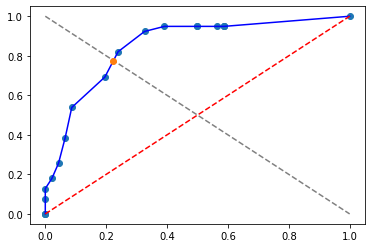

In [19]:
#bg sub ped1
TPR =[0,	0,	0,	0.076923076923077,	0.128205128205128,	0.179487179487179,	0.256410256410256,	0.384615384615385,	0.538461538461538	,0.692307692307692,	0.82051282051282,	0.923076923076923,	0.948717948717949,	0.948717948717949,	0.948717948717949	,0.948717948717949,	0.948717948717949,	0.948717948717949	,0.948717948717949, 1]
FPR =[0,	0,	0,	0,	0,	0.021739130434783,	0.043478260869565,	0.065217391304348,	0.086956521739131,	0.195652173913043	,0.239130434782609	,0.326086956521739	,0.391304347826087,	0.5	,0.5,	0.565217391304348,	0.58695652173913,	0.58695652173913	,0.58695652173913, 1]
show_roc(TPR, FPR)

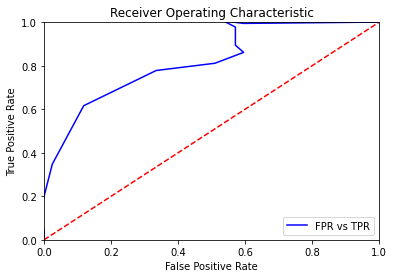

TPR
[0, 0, 0.083333333333333, 0.083333333333333, 0.333333333333333, 0.666666666666667, 0.75, 0.833333333333333, 0.833333333333333, 0.916666666666667, 0.916666666666667, 0.916666666666667, 1, 1, 1, 1]
FPR
[0, 0, 0, 0, 0, 0.142857142857143, 0.285714285714286, 0.571428571428571, 0.571428571428571, 0.571428571428571, 0.571428571428571, 0.571428571428571, 0.571428571428571, 0.571428571428571, 0.571428571428571, 1]
Intersection
Point
0.26315789473684215
1
EER = 0.26315789473684215
EER Threshold =  0.7368421052631579
AUC = 0.8273809523809523


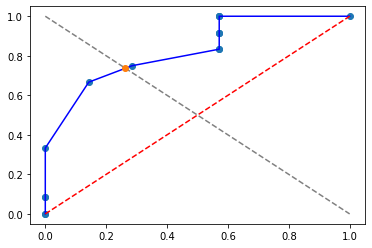

In [20]:
#bg sub ped2

TPR = [0,	0,	0.083333333333333,	0.083333333333333,	0.333333333333333,	0.666666666666667,	0.75,	0.833333333333333,	0.833333333333333,	0.916666666666667,	0.916666666666667,	0.916666666666667,	1,	1,	1, 1]

FPR = [0,	0,	0,	0,	0,	0.142857142857143,	0.285714285714286,	0.571428571428571,	0.571428571428571,	0.571428571428571,	0.571428571428571,	0.571428571428571,	0.571428571428571,	0.571428571428571,	0.571428571428571, 1]


show_roc(TPR, FPR)

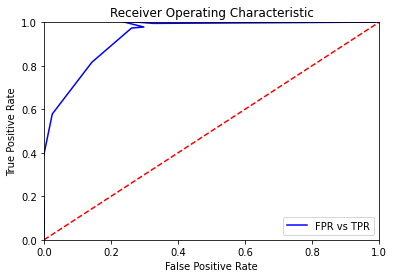

TPR
[0, 0, 0, 0, 0.083333333333333, 0.083333333333333, 0.083333333333333, 0.083333333333333, 0.166666666666667, 0.333333333333333, 0.5, 0.916666666666667, 0.916666666666667, 1, 1, 1, 1]
FPR
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.142857142857143, 0.285714285714286, 0.285714285714286, 0.285714285714286, 0.285714285714286, 1]
Intersection
Point
0.12765957446808512
1
EER = 0.12765957446808512
EER Threshold =  0.8723404255319149
AUC = 0.9464285714285714


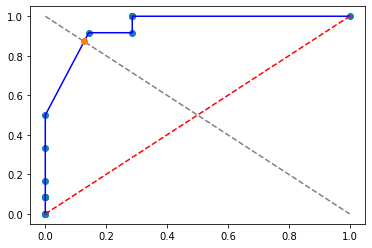

In [21]:
#bg partial sub ped2

TPR = [0,	0,	0,	0,	0.083333333333333,	0.083333333333333,	0.083333333333333,	0.083333333333333,	0.166666666666667	,0.333333333333333	,0.5	,0.916666666666667,	0.916666666666667,	1,	1,	1, 1]
FPR = [0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0.142857142857143	,0.285714285714286	,0.285714285714286	,0.285714285714286	,0.285714285714286,1]
show_roc(TPR, FPR)

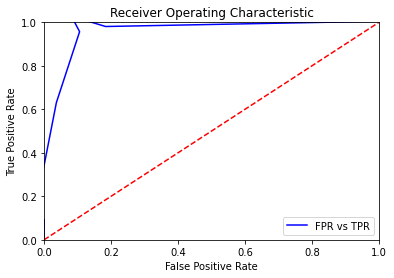

TPR
[0, 0, 0, 0, 0, 0, 0.083333333333333, 0.083333333333333, 0.083333333333333, 0.083333333333333, 0.083333333333333, 0.166666666666667, 0.666666666666667, 1, 1, 1, 1]
FPR
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.142857142857143, 0.142857142857143, 0.142857142857143, 1]
Intersection
Point
0.10000000000000003
1
EER = 0.10000000000000003
EER Threshold =  0.8999999999999999
AUC = 0.9761904761904762


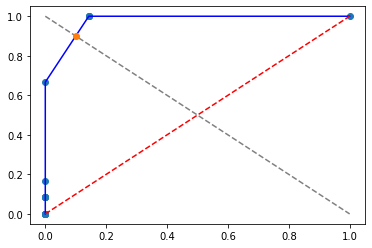

In [23]:
#ped2 no edge no bg 
TPR = [0,	0,	0,	0,	0,	0,	0.083333333333333,	0.083333333333333,	0.083333333333333,	0.083333333333333	,0.083333333333333,	0.166666666666667,	0.666666666666667	,1,	1,	1,1]
FPR = [0	,0,	0	,0	,0	,0	,0,	0	,0	,0	,0,	0,	0	,0.142857142857143	,0.142857142857143,	0.142857142857143, 1]
show_roc(TPR, FPR)


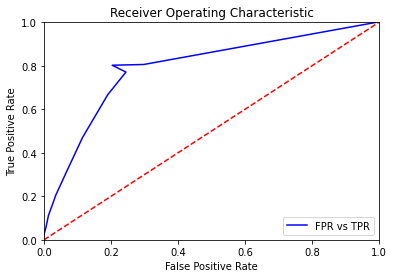

TPR
[0, 0, 0, 0, 0, 0, 0.073170731707317, 0.097560975609756, 0.170731707317073, 0.219512195121951, 0.268292682926829, 0.51219512195122, 0.634146341463415, 0.804878048780488, 0.804878048780488, 0.804878048780488, 1]
FPR
[0, 0, 0, 0, 0, 0, 0, 0.02, 0.02, 0.04, 0.06, 0.12, 0.18, 0.26, 0.26, 0.26, 1]
Intersection
Point
0.23929961089494156
1
EER = 0.23929961089494156
EER Threshold =  0.7607003891050584
AUC = 0.793658536585366


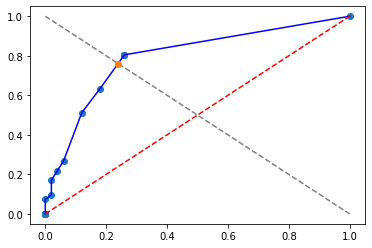

In [22]:
#no edge no bg sub ped1
#original gt
TPR = [0,	0,	0,	0,	0,	0	,0.073170731707317,	0.097560975609756,	0.170731707317073,	0.219512195121951,	0.268292682926829	,0.51219512195122,	0.634146341463415,	0.804878048780488,	0.804878048780488,	0.804878048780488, 1]
FPR = [0,	0,	0	,0,	0	,0,	0,	0.02,	0.02,	0.04,	0.06,	0.12,	0.18,	0.26,	0.26,	0.26, 1]
show_roc(TPR, FPR)